# 🛒 E-Commerce Website Logs - Full Data Analysis Project

**Objective**: Analyze user behavior, visualize trends, and build a predictive model for high spenders using e-commerce website logs.

In [2]:
!pip install seaborn


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.2 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.1 MB 1.2 MB/s eta 0:00:07
   ----- ---------------------------------- 1.0/8.1 MB 1.2 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.1 MB 1.3 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/8.1 MB 1.4 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 1.4 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.1 MB 1.4 MB/s eta 0:00:04
   ------------- -------------------------- 2.6/8.1 MB 1.5 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.1 MB 1.4 MB/s eta 0:00:04
   --------------- ------------------------ 3.1/8.1 MB 1.4 MB/s eta 0:00:04
   ------------------ -----------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [5]:
# 📥 Load the dataset
file_path = "E:\Ecommerce_Logs_Analysis\data\E-commerce Website Logs.csv"  # Change this if the file is in a different directory
df = pd.read_csv(file_path)
df.rename(columns={'accessed_Ffom': 'accessed_from'}, inplace=True)
df.head()

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_from,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,43:57.2,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.9600,No,0.0,Credit Card
1,43:57.2,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.9400,No,0.0,Debit Card
2,43:26.1,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.6200,No,0.0,Cash
3,43:26.1,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,957.5775,No,0.0,Credit Card
4,17:09.0,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.3680,No,0.0,Cash


In [6]:
# 🧹 Preprocessing
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'].fillna(df['age'].median(), inplace=True)
df['hour'] = df['accessed_date'].str.extract(r'^(\d{1,2})').astype('Int64')
df['high_spender'] = (df['sales'] > df['sales'].median()).astype(int)
df.drop(columns=['accessed_date', 'ip'], inplace=True)
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,duration_(secs),bytes,age,sales,returned_amount,hour,high_spender,network_protocol_HTTP,network_protocol_ICMP,network_protocol_TCP,...,language_serbian,language_slovene,language_swahili,language_swedish,language_tegulu,language_urdu,returned_Yes,pay_method_Credit Card,pay_method_Debit Card,pay_method_Others
0,2533,20100,28.0,261.9600,0.0,43,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,4034,20500,21.0,731.9400,0.0,43,1,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,1525,90100,20.0,14.6200,0.0,43,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,4572,100300,66.0,957.5775,0.0,43,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,3652,270200,53.0,22.3680,0.0,17,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False


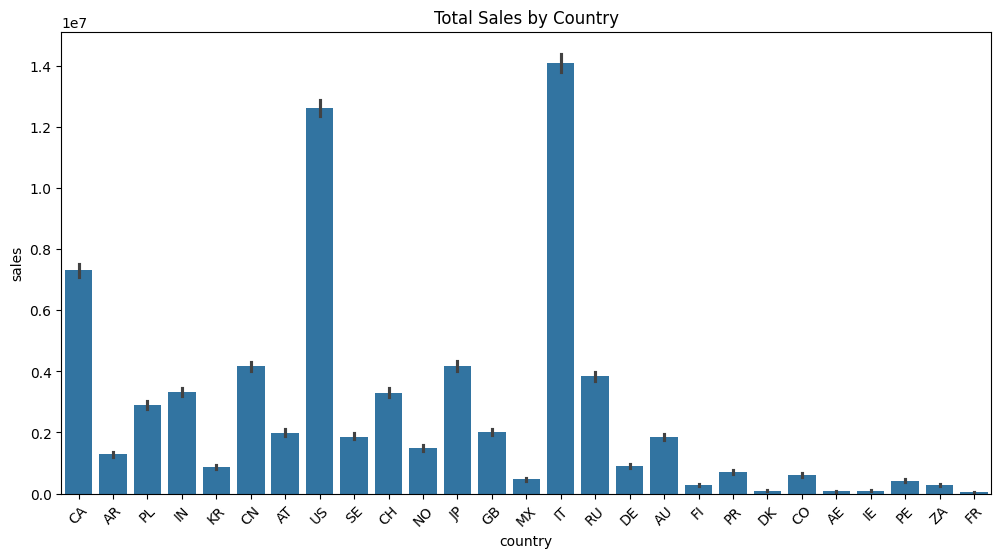

In [7]:
# 📊 Visualization: Total Sales by Country
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='country', y='sales', estimator=sum)
plt.xticks(rotation=45)
plt.title('Total Sales by Country')
plt.show()

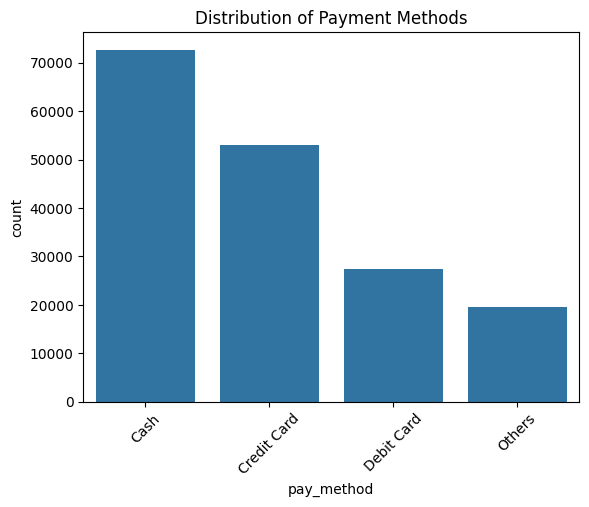

In [8]:
# 💳 Payment Method Count
sns.countplot(data=df, x='pay_method', order=df['pay_method'].value_counts().index)
plt.title('Distribution of Payment Methods')
plt.xticks(rotation=45)
plt.show()

In [9]:
# 🎯 ML Model: Predicting High Spenders
X = df_encoded.drop(columns=['sales', 'returned_amount', 'high_spender'])
y = df_encoded['high_spender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.50      0.63     17399
           1       0.64      0.90      0.75     17169

    accuracy                           0.70     34568
   macro avg       0.74      0.70      0.69     34568
weighted avg       0.74      0.70      0.69     34568



## ✅ Conclusion
- We analyzed user traffic and purchasing behavior by geography and language.
- Built a random forest classifier to identify potential high-spending users.
- Achieved classification performance using basic user metadata.

**Next Steps**:
- Add time-series forecasting.
- Build a Streamlit dashboard for interactive exploration.
- Perform user segmentation with clustering.